In [1]:
import os
import sys
import ast
import pickle

glp = os.path.abspath("../code")
if not glp in sys.path: sys.path.append( glp )

from global_paths import global_paths

if not global_paths["COBS"] in sys.path: sys.path.append( global_paths["COBS"] )

In [2]:
import scipy.special
import scipy.spatial.distance

In [3]:
import cobs
import torch
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess

In [4]:
import StateUtilities as SU

In [5]:
import visualization_helper_v2 as vh

In [6]:
fig_width = 16

In [7]:
dirnames = ["../checkpoints/b001/",
            "../checkpoints/s135/20210511-1532/",
            "../checkpoints/s145/20210513-2102/"]

In [8]:
alldfs = [ vh.convert_sqlite_to_df(dirname) for dirname in dirnames ]

Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.


In [9]:
q_values = vh.load_and_convert_q_values(dirnames)

No Q-value list found for ../checkpoints/b001/.


In [10]:
vh.get_arguments_overview(dirnames)

,b001,s135,s145
algorithm,baseline_rule-based,ddqn,ddqn
lr,0.01,0.02,0.02
discount_factor,0.9,0.75,0.75
batch_size,128,256,256
lambda_rwd_energy,1e-05,0.001,1e-05
reward_function,sum_energy_mstpc,rulebased_agent_output,sum_energy_mstpc
reward_scale,1.0,0.1,1.0
reward_offset,0.0,0.05,0.1
stp_reward_step_offset,0.0,1.0,1.0
target_network_update_freq,3,4,6


In [11]:
vh.get_runtime_overview_df(alldfs, dirnames)

,b001,s135,s145
Number of training episodes,1.0,15928.000000,31843.000000
Runtime in s,0.0,19711.370469,151945.572358
Runtime in h,0.0,5.475381,42.207103
Mean episode runtime in s,0.0,1.237530,4.771710
Mean episode runtime during eval. episode in s,0.0,1.359281,5.025088
Mean episode runtime after eval. episode in s,NaN,4.881979,4.716188
Mean episode runtime in no eval. episode in s,NaN,1.236130,4.770012


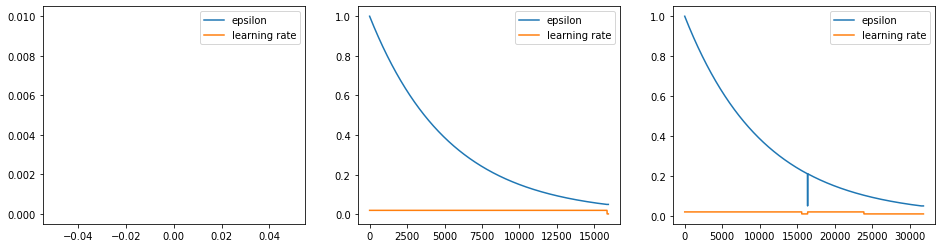

In [12]:
p, _ = vh.complete_plot_epsilon(alldfs, fig_width)
p.show()

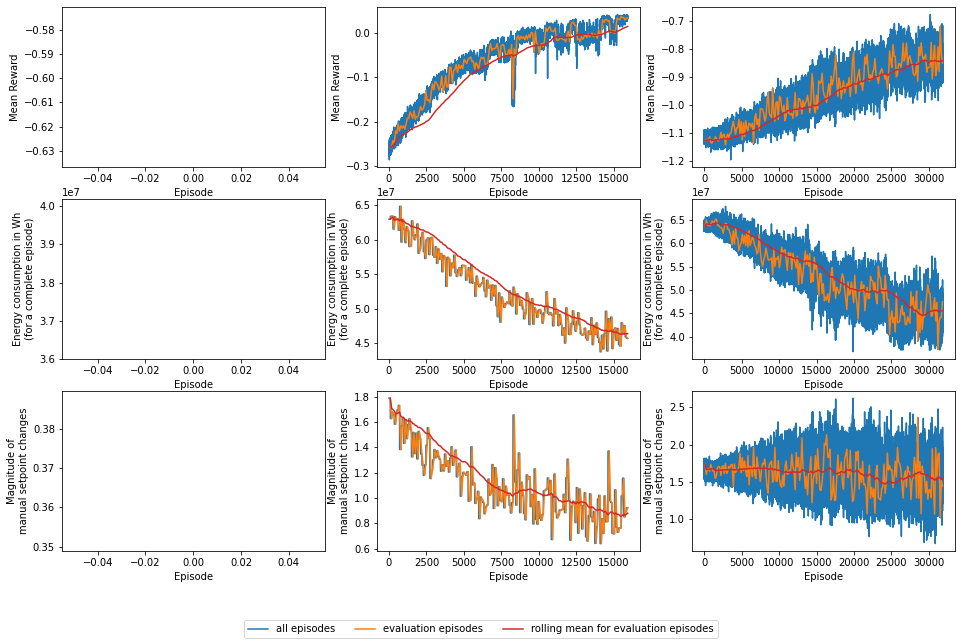

In [13]:
p, _ = vh.complete_plot_reward_stpc_econs(alldfs, fig_width)
p.show()

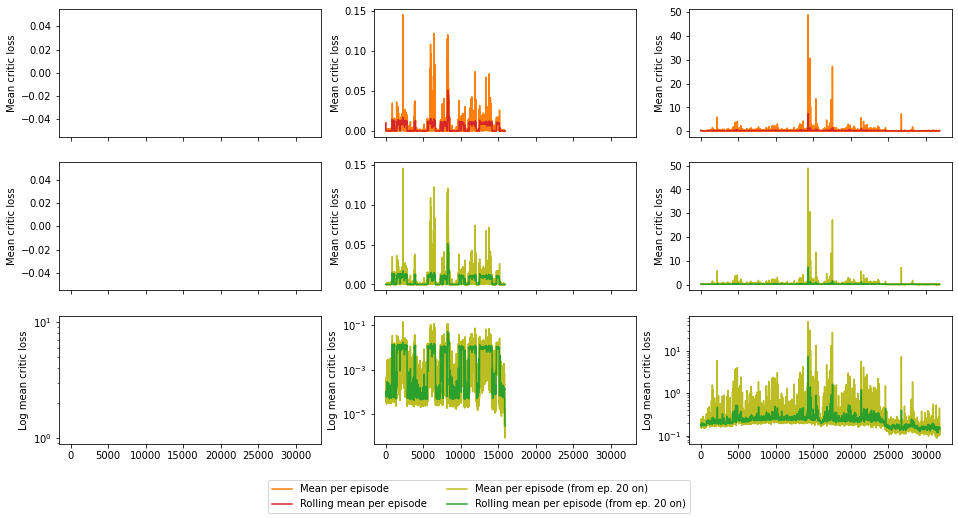

In [14]:
p, _ = vh.complete_plot_losses(alldfs, fig_width, with_agents=False)
p.show()

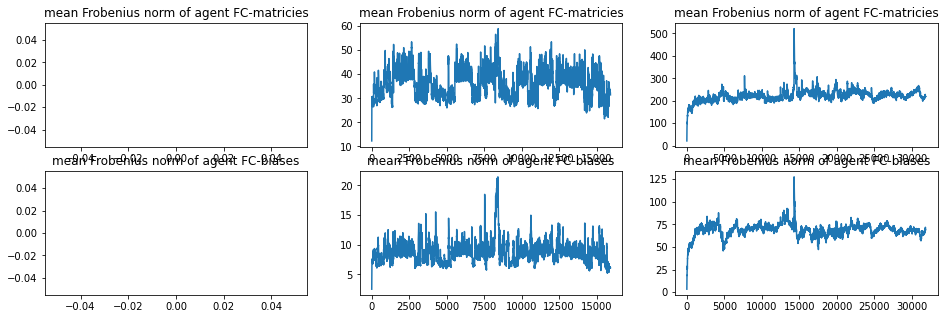

In [15]:
p, _ = vh.complete_plot_frobenius_norms(alldfs, fig_width, with_critics=False)
p.show()

In [16]:
last_available_eval_episodes = vh.compute_last_available_eval_episode(alldfs)

Last available evaluation episode for dfs0:      0
Last available evaluation episode for dfs1:  15927
Last available evaluation episode for dfs2:  31799


<h3>Details for one week</h3>

In [17]:
#selected_episodes = [13120 - 1, 14480 - 1, 14480 - 1]
#selected_weeks    = [datetime.datetime(2017, 1, 1), datetime.datetime(2017, 1, 1), datetime.datetime(2017, 1, 1)]

In [18]:
if not "selected_episodes" in locals().keys():
    selected_episodes = last_available_eval_episodes.copy()
if not "selected_weeks" in locals().keys():
    # the start of the evaluation episode
    selected_weeks = [datetime.datetime.strptime(dfs['sees'].iloc[0]["datetime"], "%Y-%m-%d %H:%M:%S")
                      for dfs in alldfs]

subdfs = vh.select_week_and_episode_for_dfs_list(alldfs, selected_episodes, selected_weeks)

In [19]:
vh.print_reward_informations(subdfs, selected_episodes)

First complete week of evaluation episode
For episode     0: Energy consumption:   38092.23 kWh; Numer of setpoint changes: 265.52139414605494
For episode 15927: Energy consumption:   45732.08 kWh; Numer of setpoint changes: 662.3839435757918
For episode 31799: Energy consumption:   44656.72 kWh; Numer of setpoint changes: 933.3043740356484

Mean values for episode ...
...     0: Reward: -0.60365 kWh; Setpoint change magnit.:  0.36929; Energy cons.: 52979.45221
... 15927: Reward:  0.03414 kWh; Setpoint change magnit.:  0.92126; Energy cons.: 63605.11927
... 31799: Reward: -0.78071 kWh; Setpoint change magnit.:  1.29806; Energy cons.: 62109.48203


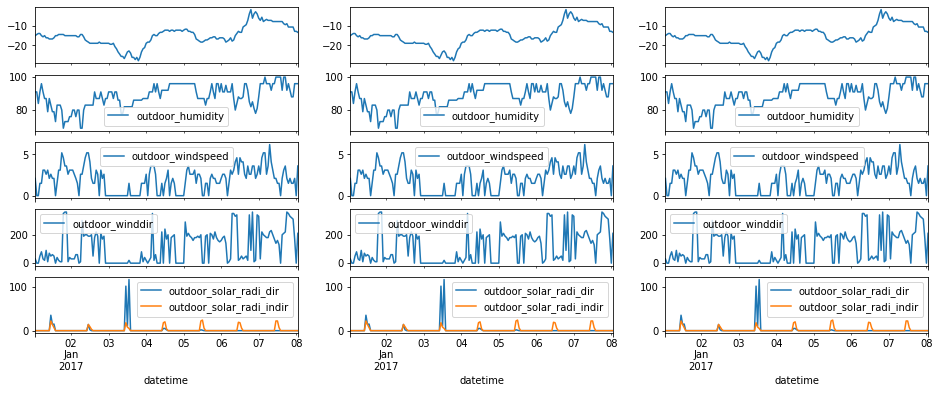

In [20]:
p, _ = vh.complete_plot_weather_information(subdfs, fig_width)
p.show()

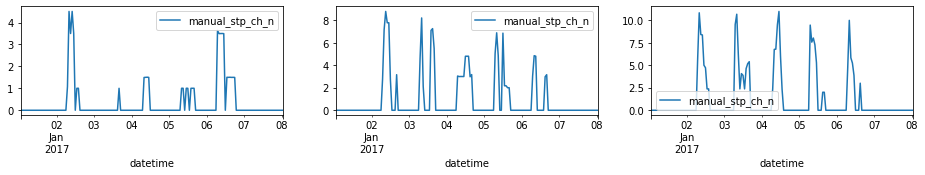

In [21]:
p, _ = vh.complete_plot_number_of_stp_ch(subdfs, fig_width)
p.show()

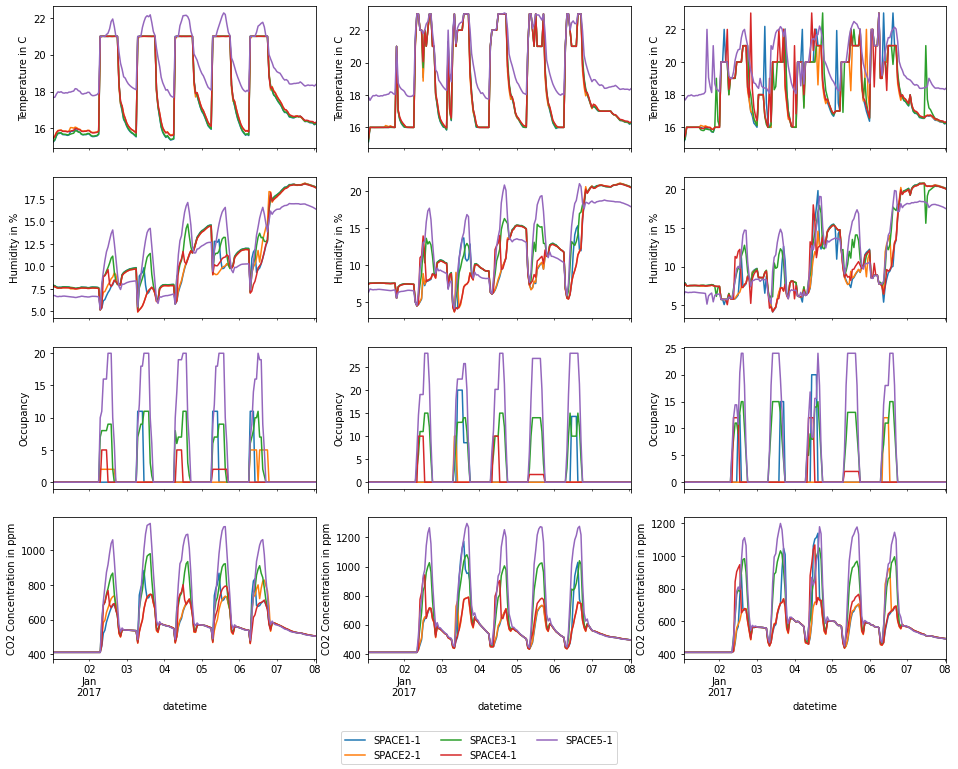

In [22]:
p, _ = vh.complete_plot_room_status(subdfs, fig_width)
p.show()

In [23]:
subdfs_rooms, subdfs_agents = vh.get_available_rooms_and_agents(subdfs)

Available Rooms     in (sub-)dfs0: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs0: [0 1 2 3 4] 

Available Rooms     in (sub-)dfs1: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs1: [0] 

Available Rooms     in (sub-)dfs2: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs2: [0 1 2 3 4] 



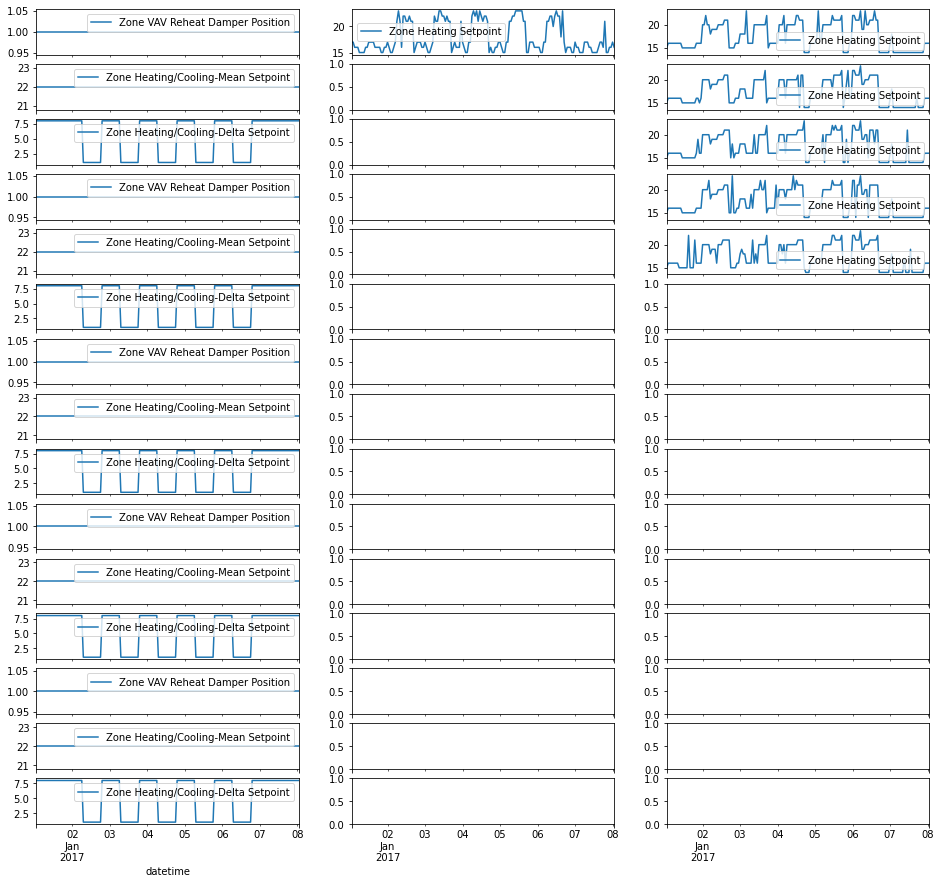

In [24]:
p, _ = vh.complete_plot_all_agent_outputs(subdfs, fig_width, subdfs_agents)
p.show()

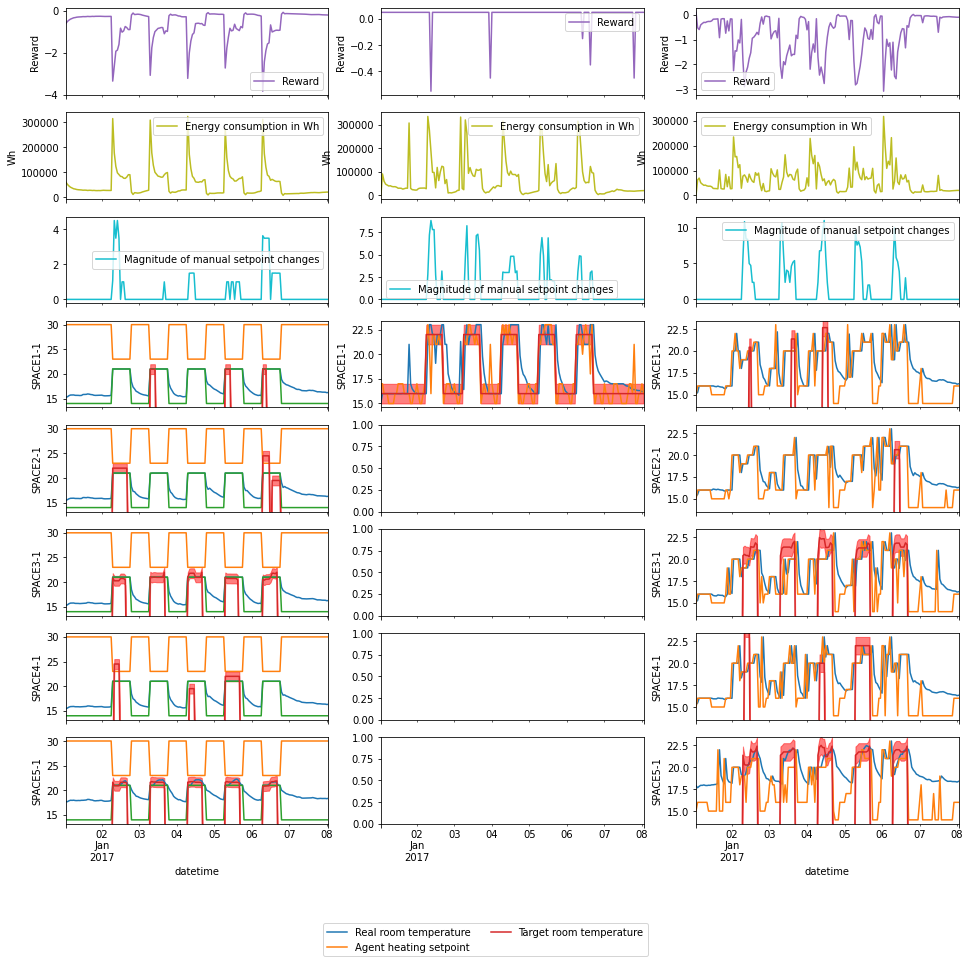

In [25]:
p, _ = vh.complete_plot_total_overview(subdfs, fig_width, subdfs_rooms, subdfs_agents)
p.show()

<h3>Details for a day</h3>

In [26]:
#selected_periods1    = [datetime.datetime(2017, 1, 3),
#                        datetime.datetime(2017, 1, 3),
#                        datetime.datetime(2017, 1, 3)]
#selected_periods1_end= [datetime.datetime(2017, 1, 4),
#                        datetime.datetime(2017, 1, 4),
#                        datetime.datetime(2017, 1, 4)]

In [27]:
if not "selected_periods1" in locals().keys():
    selected_periods1     = [datetime.datetime(2017, 1, 3) for _ in range(len(alldfs))]
if not "selected_periods1_end" in locals().keys():
    selected_periods1_end = [datetime.datetime(2017, 1, 4) for _ in range(len(alldfs))]

subdfs = vh.select_week_and_episode_with_end_for_dfs_list(
            alldfs,
            selected_episodes,
            selected_periods1,
            selected_periods1_end)

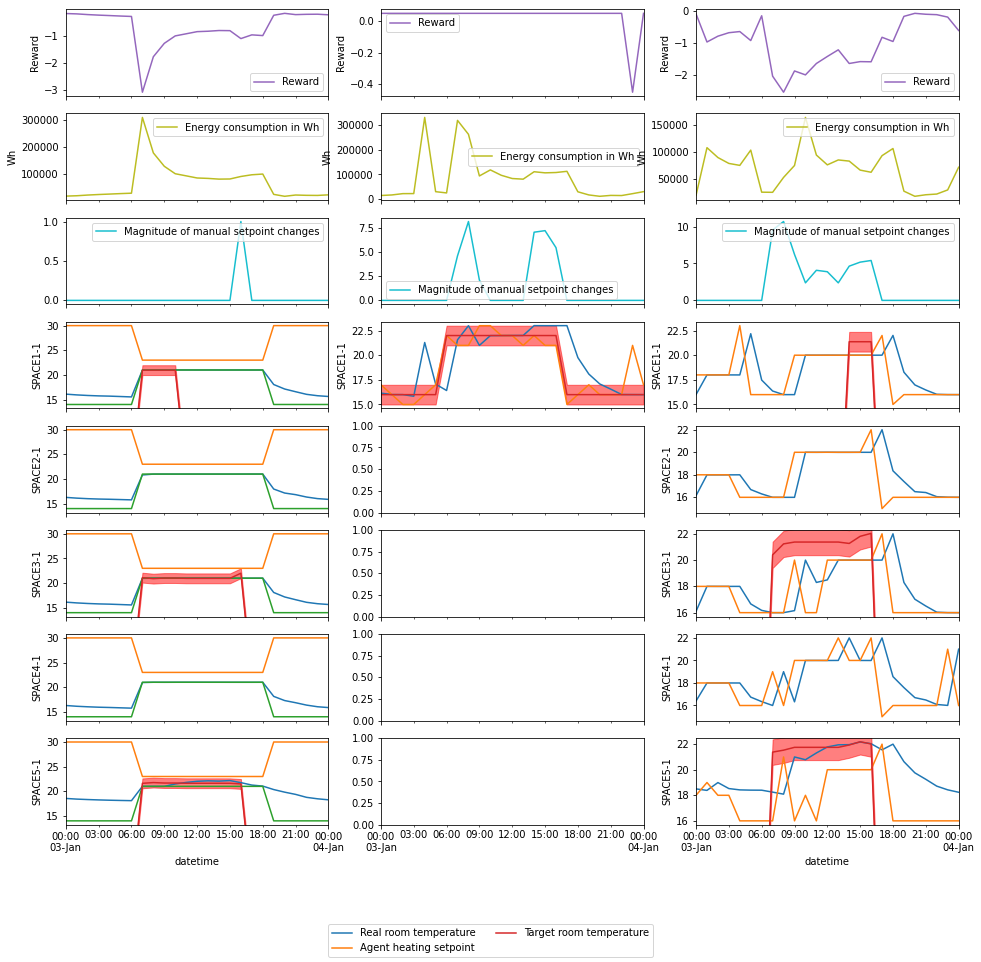

In [28]:
p, _ = vh.complete_plot_total_overview(subdfs, fig_width, subdfs_rooms, subdfs_agents)
p.show()

<h3>Details for a complete month</h3>

In [29]:
#selected_periods2    = [datetime.datetime(2017, 1, 1),
#                        datetime.datetime(2017, 1, 1),
#                        datetime.datetime(2017, 1, 1)]

In [30]:
if not "selected_periods2" in locals().keys():
    selected_periods2     = [datetime.datetime(2017, 1, 1) for _ in range(len(alldfs))]
selected_periods2_end = [datetime.datetime(2017, 1, 30) for _ in range(len(alldfs))]

subdfs = vh.select_week_and_episode_with_end_for_dfs_list(
            alldfs,
            selected_episodes,
            selected_periods2,
            selected_periods2_end)

For plot number 1, mean energy consumption =  52077.6 Wh, mean reward = -0.5913
For plot number 2, mean energy consumption =  62643.2 Wh, mean reward =  0.0336
For plot number 3, mean energy consumption =  62064.1 Wh, mean reward = -0.7602


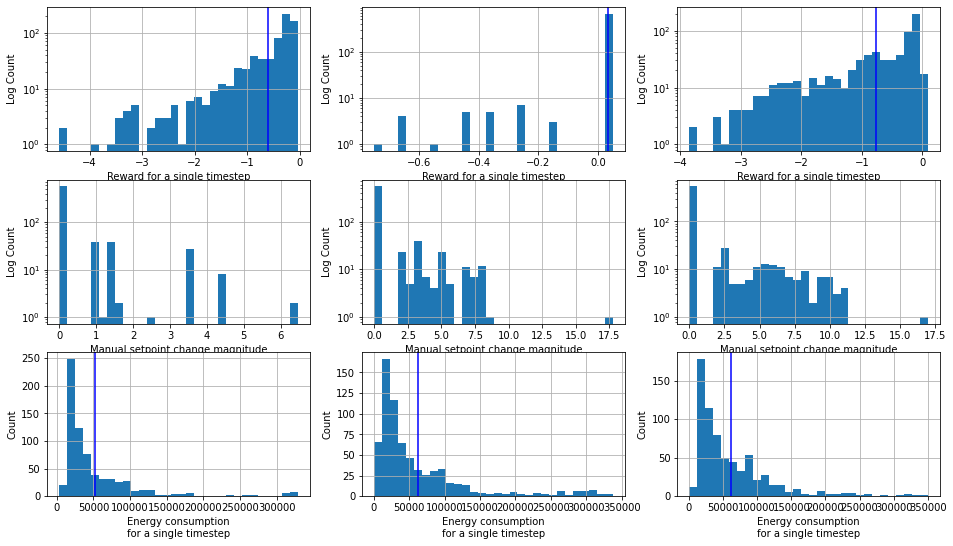

In [31]:
vh.plot_stpch_and_econs_distrib(subdfs, fig_width)

In [32]:
col0_reward_hist, hist_labels = np.histogram(subdfs[1]["sees"].loc[:, "reward"], bins=30, range=(-10,2))
col1_reward_hist, hist_labels = np.histogram(subdfs[1]["sees"].loc[:, "reward"], bins=30, range=(-10,2))
col2_reward_hist, hist_labels = np.histogram(subdfs[2]["sees"].loc[:, "reward"], bins=30, range=(-10,2))
scipy.special.rel_entr(col1_reward_hist, col2_reward_hist)

array([   0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,  -23.83098211,
        -46.68049094, 2966.65023437,    0.        ,    0.        ,
          0.        ,    0.        ])

In [33]:
scipy.spatial.distance.jensenshannon(col1_reward_hist, col2_reward_hist)

0.7693587462573775

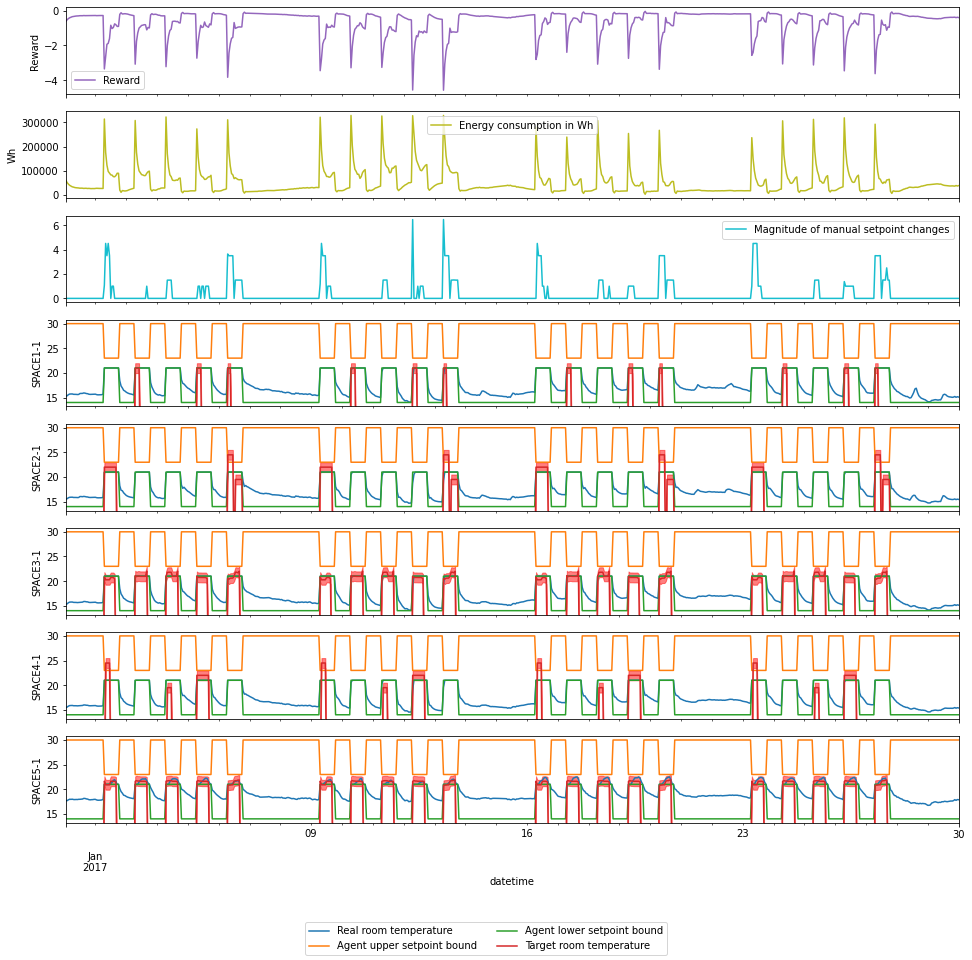

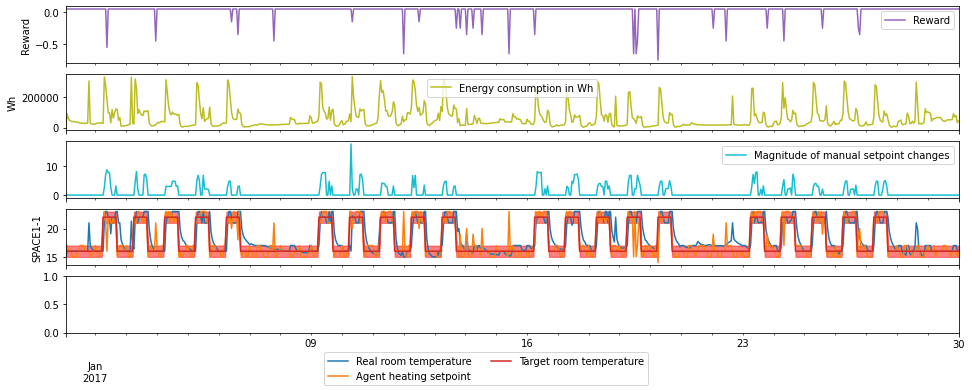

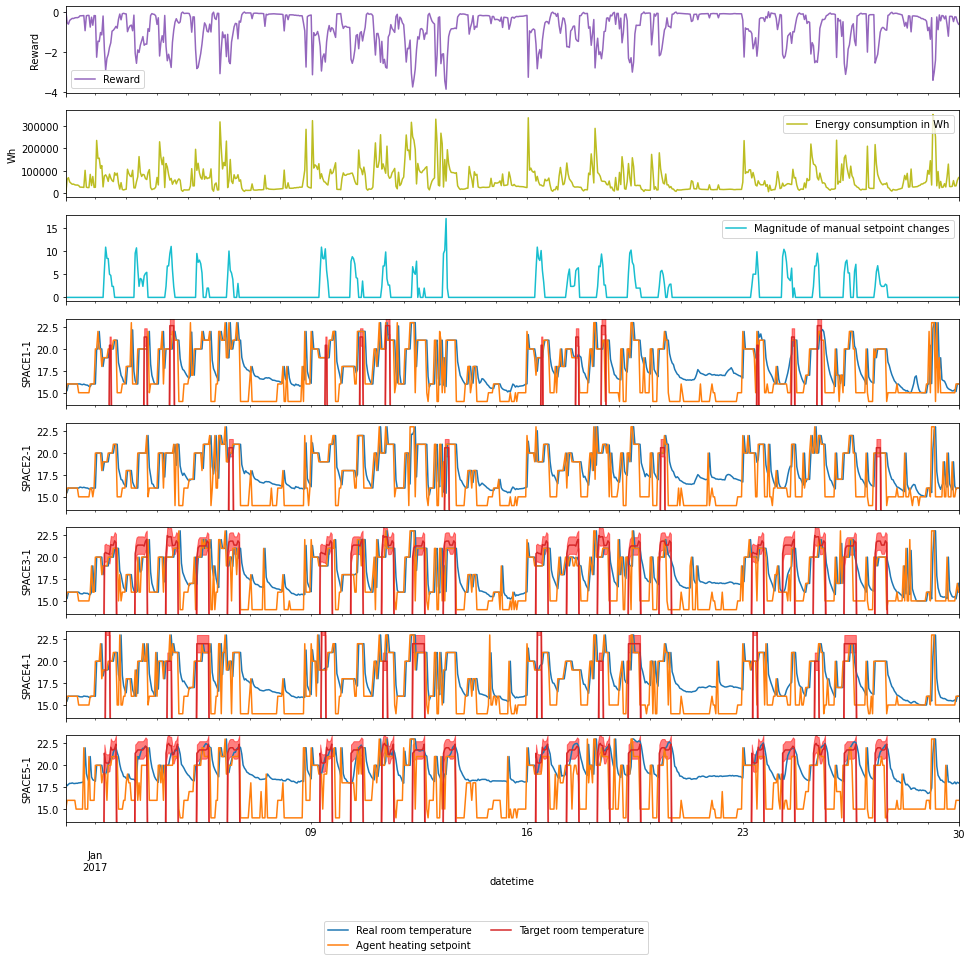

In [34]:
for idx, sdfs in enumerate(subdfs):
    p, _ = vh.complete_plot_total_overview(sdfs, fig_width,
                                           subdfs_rooms[idx],
                                           subdfs_agents[idx])
    p.show()

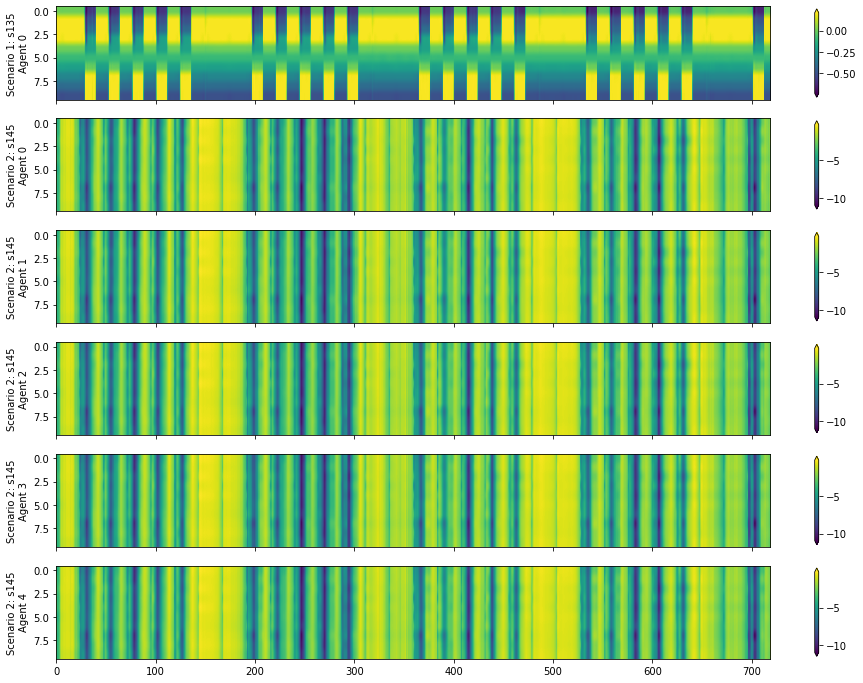

In [35]:
vh.plot_q_values(q_values, fig_width)